In [1]:
import numpy as np

import matplotlib.ticker as mtick
import wf_psf as wf
import matplotlib.pyplot as plt
import matplotlib as mpl

# %matplotlib inline
params = {
    "font.size": 18,
    "legend.fontsize": 18,
    "legend.frameon": False,
    "axes.labelsize": 18,
    "axes.titlesize": 18,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "figure.figsize": (7, 5),
    "xtick.top": True,
    "axes.unicode_minus": False,
    "ytick.right": True,
    "xtick.bottom": True,
    "ytick.left": True,
    "xtick.major.pad": 8,
    "xtick.major.size": 8,
    "xtick.minor.size": 4,
    "ytick.major.size": 8,
    "ytick.minor.size": 4,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "axes.linewidth": 1.5,
    "text.usetex": False,
    "font.family": "serif",
    "font.serif": "cmr10",
    "mathtext.fontset": "cm",
    "axes.formatter.use_mathtext": True,  # needed when using cm=cmr10 for normal text
}


mpl.rcParams.update(params)

/Users/tl255879/miniconda3/envs/wf_tools/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:


optim_hist_path = "/Users/tl255879/Documents/research/projects/wf-projects/phase-retrieval-paper/v1_trained_models/paper_output_v1/old_optim-hist/"


optim_hist_no_reset = np.load(
    optim_hist_path + "optim_hist_poly_5_cycles_256_hd_proj_eval_full_1.npy",
    allow_pickle=True
)[()]
optim_hist_reset = np.load(
    optim_hist_path + "optim_hist_poly_5_cycles_256_hd_proj_reset_eval_full_1.npy",
    allow_pickle=True
)[()]


In [3]:
save_dir = './../plots/'
plot_results = True



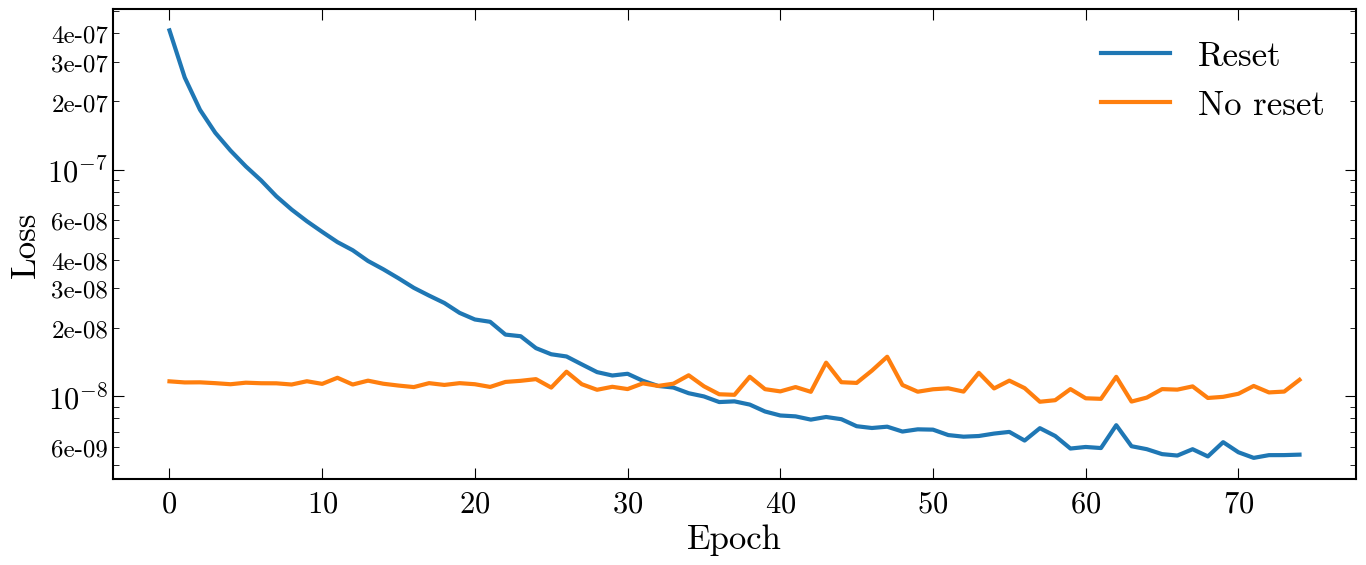

In [4]:
plot_loss = 'val_loss'

cmap = plt.get_cmap('tab10')

text_fontsize = 25
maj_tick_size = 22
min_tick_size = 18

plt.figure(figsize=(14,6))
ax = plt.gca()

plt.plot(
    # np.arange(1,len(res)+1),
    optim_hist_reset["nonparam_cycle2"][plot_loss],
    color=cmap(0),
    label="Reset",
    linewidth=3,
    markersize=16,
    # marker=".",
)

plt.plot(
    # np.arange(1,len(res)+1),
    optim_hist_no_reset["nonparam_cycle2"][plot_loss],
    color=cmap(1),
    label="No reset",
    linewidth=3,
    markersize=16,
    # marker=".",
)

# ax.set_ylim(1, 200)
ax.set_yscale('log')
# ax.yaxis.tick_left()
plt.legend(fontsize=text_fontsize)
plt.ylabel(r'Loss', fontsize=text_fontsize)
plt.xlabel(r'Epoch', fontsize=text_fontsize)


ax.tick_params(axis='both', which='major', labelsize=maj_tick_size)
ax.tick_params(axis='y', which='minor', labelsize=min_tick_size)
formatter = mtick.LogFormatter(labelOnlyBase=False, minor_thresholds=(3, 0.4))
ax.yaxis.set_minor_formatter(formatter)

plt.tight_layout()
if plot_results:
    plt.savefig(
        '{:s}{:s}'.format(save_dir, 'optim_plot_no_reset.pdf'),
        bbox_inches='tight',
        dpi=200
    )
plt.show()

